In [2]:
!pip install networkx

# Type of Networks

## Symmetric Networks

In [0]:
# creating the network

import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

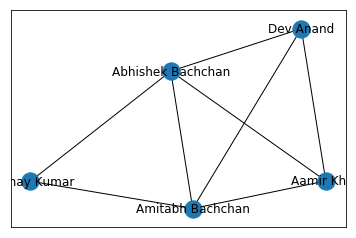

In [4]:
# creating the viz

nx.draw_networkx(G_symmetric)
# nx.draw_networkx?

## Asymmetric Networks

In [0]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

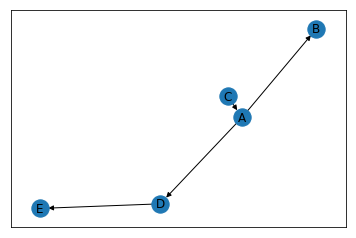

In [6]:
nx.draw_networkx(G_asymmetric)

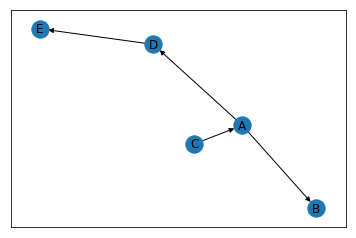

In [7]:
nx.spring_layout(G_asymmetric)  #this is better, but different result occurs for each run
nx.draw_networkx(G_asymmetric)

## Weighted Networks

In [0]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)


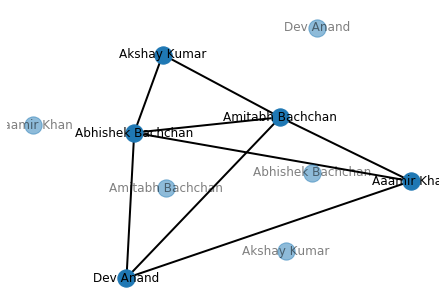

In [9]:
# messy looks, please check next sample
import matplotlib.pyplot as plt

elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 0.5]

# pos = nx.spring_layout(G_weighted)  # positions for all nodes

# nodes
# nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw(G_weighted, edgelist=elarge,
                       width=2, with_labels=True)
nx.draw(G_weighted, edgelist=esmall,
                       width=2, alpha=0.5, edge_color='b', style='dashed', with_labels=True)

# labels
# nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()



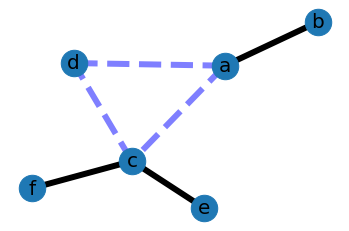

In [10]:
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

## Multigraph

In [11]:
G = nx.MultiGraph()
G.add_edge('A','B', relation = 'neighbor')
G.add_edge('A','B',relation = 'friend')
G.add_edge('B','C', relation = 'neighbor')
G.add_edge('D','C',relation = 'friend')

0

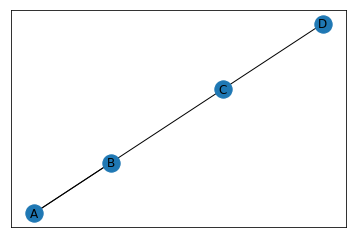

In [12]:
nx.draw_networkx(G) # the edges between A & B seems darker showing that it has more than 1 relation

In [13]:
# check connections
G.edges()

MultiEdgeDataView([('A', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'D')])

# Network Connectivity

## Degree

In [14]:
# show number of relationship of particular node
nx.degree(G_symmetric, 'Dev Anand')

3

## Clustering Coefficient

In [15]:
# local clustering coefficient
# the fraction of pairs of the node's friends (that is connections) that are connected with each other
nx.clustering(G_symmetric)

{'Aamir Khan': 1.0,
 'Abhishek Bachchan': 0.6666666666666666,
 'Akshay Kumar': 1.0,
 'Amitabh Bachchan': 0.6666666666666666,
 'Dev Anand': 1.0}

In [16]:
# sum of all the local clustering coefficients divided by the number of nodes)
nx.average_clustering(G_symmetric)

0.8666666666666666

## Distance

In [17]:
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

In [18]:
nx.shortest_path_length(G_symmetric, 'Akshay Kumar', 'Dev Anand')

2

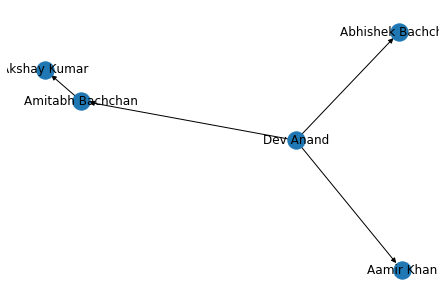

In [19]:
# breadth-first search algorithm
# network structure telling how we can reach other nodes of the network starting from the node chosen (Dev Anand)
T = nx.bfs_tree(G_symmetric, 'Dev Anand')
nx.draw(T, with_labels=True)

## Eccentricity

In [20]:
# largest distance of A to other nodes
print(nx.eccentricity(G_symmetric, 'Dev Anand'))
print(nx.eccentricity(G_symmetric, 'Abhishek Bachchan'))

2
1


# Network Influencers

Below are several centrality measures, i.e. Measures to determine who is the biggest influencers. 

## Degree Centrality

In [21]:
# measure of the number of connections a particular node
nx.degree_centrality(G_symmetric)

{'Aamir Khan': 0.75,
 'Abhishek Bachchan': 1.0,
 'Akshay Kumar': 0.5,
 'Amitabh Bachchan': 1.0,
 'Dev Anand': 0.75}

## Eigenvector Centrality

In [22]:
# a node is important if it is connected to other important nodes
nx.eigenvector_centrality(G_symmetric)

{'Aamir Khan': 0.43904190094642953,
 'Abhishek Bachchan': 0.5100364187624349,
 'Akshay Kumar': 0.3069366734339046,
 'Amitabh Bachchan': 0.5100364187624349,
 'Dev Anand': 0.43904190094642953}

## Betweenness Centrality

In [23]:
# The nodes with high betweenness centrality can have a strategic control and influence on others.
nx.betweenness_centrality(G_symmetric)

{'Aamir Khan': 0.0,
 'Abhishek Bachchan': 0.16666666666666666,
 'Akshay Kumar': 0.0,
 'Amitabh Bachchan': 0.16666666666666666,
 'Dev Anand': 0.0}

# Tutorial

In [24]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
G_fb = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/Facebook_SNA/facebook_combined.txt', create_using = nx.Graph(), nodetype = int)

In [26]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(-0.9514347639686744,
 1.0939699140197914,
 -0.8892737798843865,
 0.601605670944262)

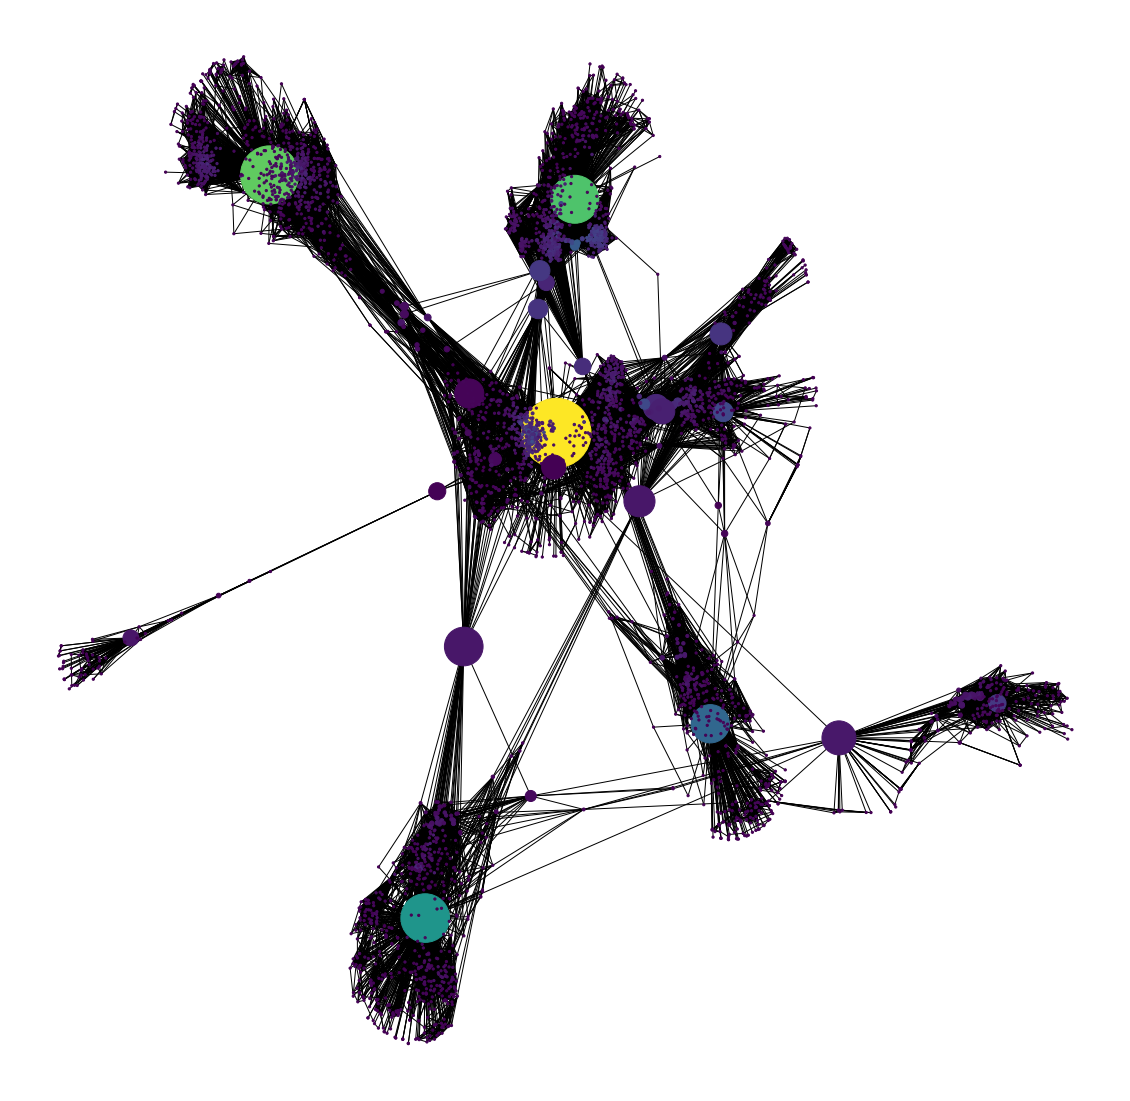

In [27]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [28]:
# order by highest measure of between centrality
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

In [0]:
degCent = nx.degree_centrality(G_fb)
eigCent = nx.eigenvector_centrality(G_fb)

In [30]:
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

In [32]:
sorted(eigCent, key=eigCent.get, reverse=True)[:5]

[1912, 2266, 2206, 2233, 2464]